✅ Loaded depth map
Shape: (480, 640)
Dtype: uint16
Min: 5640 Max: 10300


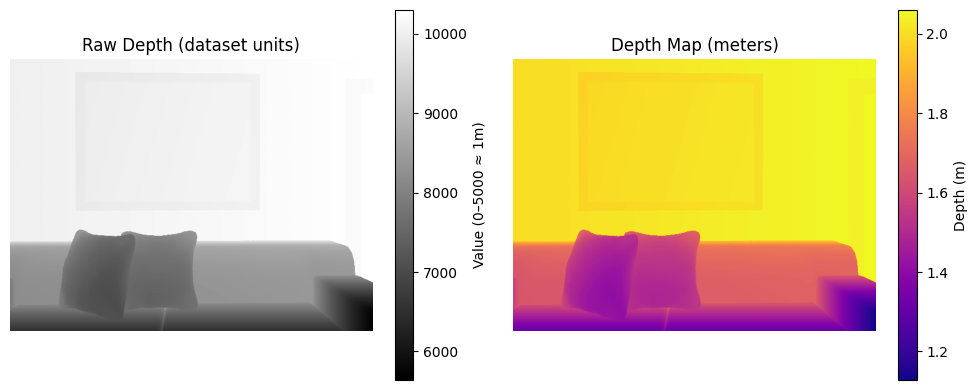


Pixel @(50,100) = 10025 → 2.005 m

Nonzero depth range: 1.128 m to 2.060 m


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Path to depth map ---
depth_path = "/home/aniruth/Downloads/living_room_traj1_frei_png/depth/0.png"

# --- 1. Load as 16-bit ---
depth_raw = cv2.imread(depth_path, cv2.IMREAD_UNCHANGED)

if depth_raw is None:
    raise ValueError("Error: Could not load depth image!")

print("✅ Loaded depth map")
print("Shape:", depth_raw.shape)
print("Dtype:", depth_raw.dtype)
print("Min:", depth_raw.min(), "Max:", depth_raw.max())

# --- 2. Convert to int64 for consistency ---
depth_int64 = np.asarray(depth_raw, dtype=np.int64)

# --- 3. Visualize raw depth (in dataset units) ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(depth_int64, cmap='gray')
plt.title("Raw Depth (dataset units)")
plt.colorbar(label="Value (0-5000 ≈ 1m)")
plt.axis("off")

# --- 4. Scale to meters ---
scale = 5000.0
depth_m = depth_int64.astype(np.float32) / scale

# --- 5. Visualize scaled depth ---
plt.subplot(1,2,2)
plt.imshow(depth_m, cmap='plasma')
plt.title("Depth Map (meters)")
plt.colorbar(label="Depth (m)")
plt.axis("off")

plt.tight_layout()
plt.show()

# --- 6. Print pixel sample and range ---
y, x = 100, 50
print(f"\nPixel @({x},{y}) = {depth_int64[y, x]} → {depth_m[y, x]:.3f} m")

nonzero = depth_m[depth_m > 0]
print(f"\nNonzero depth range: {nonzero.min():.3f} m to {nonzero.max():.3f} m")
